In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
import os
import cv2
import time
from PIL import Image
from shutil import copyfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import math
from google.colab.patches import cv2_imshow
import json

In [ ]:
PATH = "/content/drive/MyDrive/CV_Project/FULL_DATABASE"
TRAINING_PATH = "/content/drive/MyDrive/CV_Project/TRAINING_IMAGES"
VALIDATION_PATH = "/content/drive/MyDrive/CV_Project/VALIDATION_IMAGES"

#this cell is used for cleaning train and validation images paths#

In [ ]:
# cel  = os.listdir(VALIDATION_PATH)

# # print('{')
# # for ce in cel:
# #   print("\"%s""\":" %ce)
# #   newpath = os.path.join(PATH, ce)
# #   #print(newpath)
# #   files = os.listdir(newpath)
# #   print("%s" %files, ", ")
# # print('}')

#_______________________________________________________________________________________________________________________________

# face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# def get_cropped(path, size):
#   images = [img for img in os.listdir(path) if img.endswith(".jpg") or img.endswith(".png")]
#   for img_name in images:
#       img_name = os.path.join(path, img_name)
#       img = cv2.imread(img_name)
#       cv2_imshow(img)
#       faces = face_cascade.detectMultiScale(img, scaleFactor=1.1, minNeighbors=4)
#       if len(faces)  == 0:
#           os.remove(img_name)
#       else:
#           for (x, y, w, h) in faces:
#               new_img = cv2.resize(img[y:y+h, x:x+w], size, interpolation= cv2.INTER_AREA)
#               cv2.imwrite(img_name, new_img)

#_______________________________________________________________________________________________________________________________

# for ce in cel:
#   get_cropped(os.path.join(PATH, ce), (175, 175))

#_______________________________________________________________________________________________________________________________

# training_clean = json.loads(open("/content/drive/MyDrive/CV_Project/clean datasets/training_clean.txt", "r").read())
# validation_clean = json.loads(open("/content/drive/MyDrive/CV_Project/clean datasets/validation_clean.txt", "r").read())

#_______________________________________________________________________________________________________________________________

# training_examples = 0
# validation_examples = 0

# for i in cel:
#     imgs = os.listdir(os.path.join(PATH, i))
    
#     train_l = training_clean.get(i)
#     val_l = validation_clean.get(i)
    
#     training_examples += len(train_l)
#     validation_examples += len(val_l)
    
#     if not os.path.isdir(os.path.join(TRAINING_PATH, i)):
#         os.mkdir(os.path.join(TRAINING_PATH, i))
#     if not os.path.isdir(os.path.join(VALIDATION_PATH, i)):
#         os.mkdir(os.path.join(VALIDATION_PATH, i))
        
#     for t in train_l:
#         img_path = os.path.join(PATH, i, t)
#         try:
#             img = Image.open(img_path)
#             img.verify()
#             if os.path.getsize(img_path) > 100 and (t.endswith(".jpg") or t.endswith(".png")) and img.mode == "RGB":
#                 copyfile(img_path, os.path.join(TRAINING_PATH, i, t))
#         except:
#             print("It failed 1 ", i, t)
            
#     # for v in val_l:
#     #     img_path = os.path.join(PATH, i, v)
#     #     try:
#     #         img = Image.open(img_path)
#     #         img.verify()
#     #         if os.path.getsize(img_path) > 100 and (v.endswith(".jpg") or v.endswith(".png")) and img.mode == "RGB":
#     #             copyfile(img_path, os.path.join(VALIDATION_PATH, i, v))
#     #     except:
#     #         print("It failed 2 ", i, v)     
            


# Training The Model 

In [ ]:
img_gen = ImageDataGenerator(rescale = 1/ 255.)

train_gen = img_gen.flow_from_directory(TRAINING_PATH, 
                                       target_size=(175, 175),
                                       batch_size=128, 
                                       class_mode="categorical")

img_gen = ImageDataGenerator(rescale = 1/ 255.)

val_gen = img_gen.flow_from_directory(VALIDATION_PATH, 
                                       target_size=(175, 175),
                                       batch_size=64, 
                                       class_mode="categorical")

Found 2463 images belonging to 22 classes.
Found 451 images belonging to 22 classes.


In [ ]:
classes_ = {v:k for k,v in train_gen.class_indices.items()}

In [ ]:
tf.keras.backend.clear_session()

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation="relu", padding="same", input_shape=(175, 175, 3)),
    tf.keras.layers.MaxPool2D((2,2)),

    tf.keras.layers.Conv2D(32, (3,3), activation="relu", padding="same"),
    tf.keras.layers.MaxPool2D((2,2)),
    
    tf.keras.layers.Conv2D(64, (3,3), activation="relu", padding="same"),
    tf.keras.layers.MaxPool2D((2,2)),
    
    tf.keras.layers.Conv2D(128, (3,3), activation="relu", padding="same"),
    tf.keras.layers.MaxPool2D((2,2)),
    
    tf.keras.layers.Conv2D(128, (3,3), activation="relu", padding="same"),
    tf.keras.layers.MaxPool2D((2,2)),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense()
    
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(len(train_gen.class_indices), activation="softmax")    
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 175, 175, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 87, 87, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 43, 43, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 21, 21, 64)       0

In [ ]:
model.compile(optimizer="adam",
             loss="categorical_crossentropy", 
             metrics=["accuracy"])

#Callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(patience=6)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("faces.h5", save_best_only=True)

In [ ]:
history = model.fit(train_gen, validation_data = val_gen, epochs=200,callbacks=[early_stopping, model_checkpoint])

Epoch 1/200
20/20 [==============================] - 107s 5s/step - loss: 3.0929 - accuracy: 0.0516 - val_loss: 3.0913 - val_accuracy: 0.0488
Epoch 2/200
20/20 [==============================] - 103s 5s/step - loss: 3.0887 - accuracy: 0.0589 - val_loss: 3.0901 - val_accuracy: 0.0488
Epoch 3/200
20/20 [==============================] - 105s 5s/step - loss: 3.0842 - accuracy: 0.0633 - val_loss: 3.0833 - val_accuracy: 0.0466
Epoch 4/200
20/20 [==============================] - 104s 5s/step - loss: 3.0647 - accuracy: 0.0564 - val_loss: 3.0412 - val_accuracy: 0.0599
Epoch 5/200
20/20 [==============================] - 103s 5s/step - loss: 2.9826 - accuracy: 0.0922 - val_loss: 2.8533 - val_accuracy: 0.1441
Epoch 6/200
20/20 [==============================] - 105s 5s/step - loss: 2.7789 - accuracy: 0.1502 - val_loss: 2.6205 - val_accuracy: 0.1929
Epoch 7/200
20/20 [==============================] - 103s 5s/step - loss: 2.5006 - accuracy: 0.2339 - val_loss: 2.2650 - val_accuracy: 0.2727
Epoch 

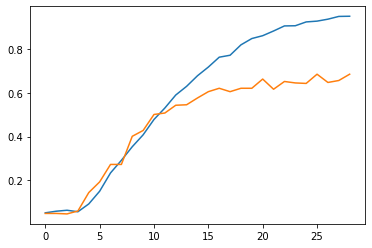

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

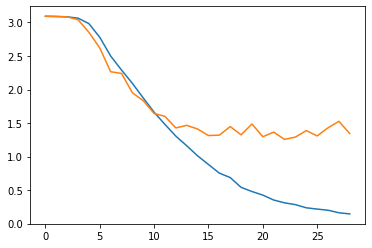

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

# Testing the Model 

In [ ]:
model = tf.keras.models.load_model("faces.h5")

In [ ]:
#get_cropped("/content/drive/MyDrive/CV_Project/test_images", (175, 175)) #clean the test images

In [ ]:
imgs = [i for i in os.listdir("/content/drive/MyDrive/CV_Project/test_images") if (i.endswith(".jpg") or i.endswith(".png"))]

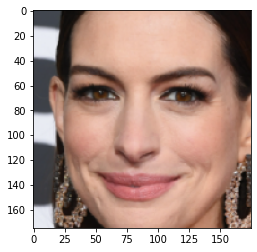

guess: Anne Hathaway    expected: anne_hatheway.png


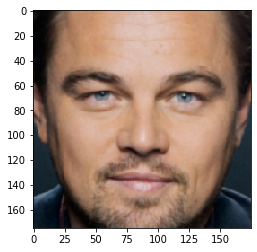

guess: Leonardo DiCaprio    expected: leo_dicaprio.png


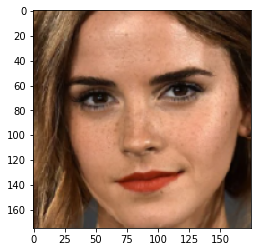

guess: Alexandra Daddario    expected: emma_watson.png


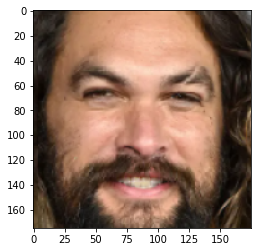

guess: Jason Momoa    expected: jason_momoa.png


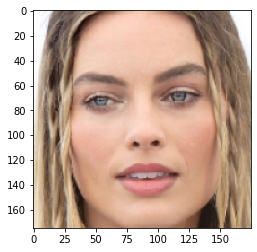

guess: scarlett johansson    expected: margot_robbie.png


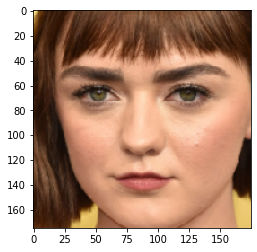

guess: Maisie Williams    expected: maisie_williams.png


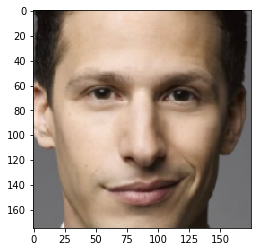

guess: Andy Samberg    expected: andy_samberg.png


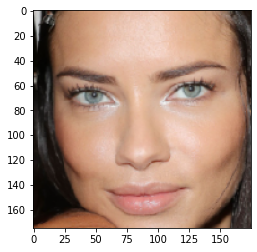

guess: Adriana Lima    expected: adriana_lima.png


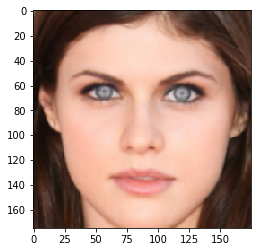

guess: Alexandra Daddario    expected: alexandra_daddario.png


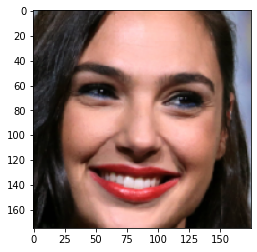

guess: gal gadot    expected: gal_gadot.png


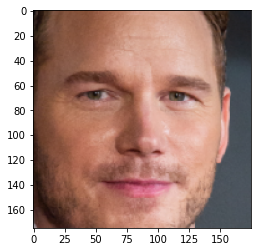

guess: Chris Pratt    expected: chris_pratt.png


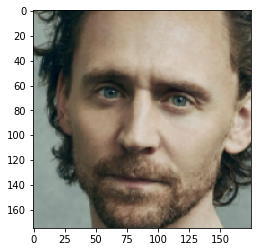

guess: Tom Hiddleston    expected: tom_hiddlestone.png


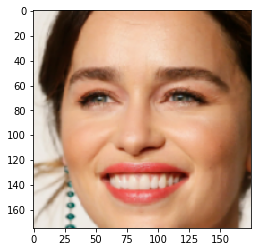

guess: Emilia Clarke    expected: emilia_clarke.png


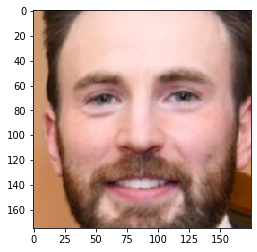

guess: Chris Evans    expected: chris_evans.png


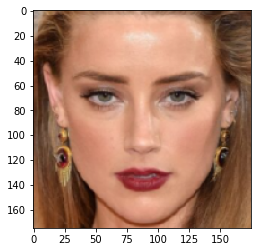

guess: Maisie Williams    expected: amber_heard.png


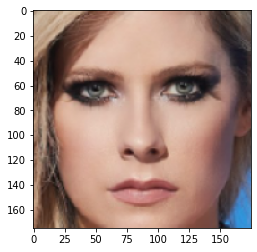

guess: scarlett johansson    expected: avril_lavigne.png


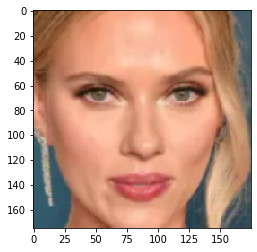

guess: scarlett johansson    expected: scarlett_johanneson.png


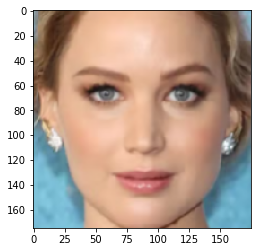

guess: Jennifer Lawrence    expected: jennifer_lawrence.png


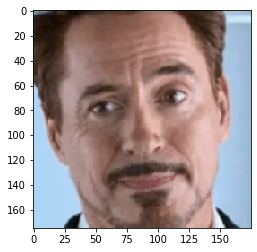

guess: Robert Downey Jr    expected: robert_d_junior.png


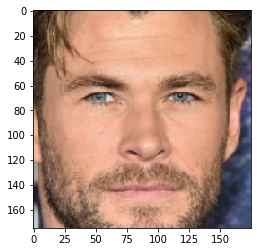

guess: Chris Hemsworth    expected: chris_hemsworth.png


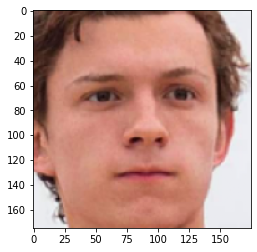

guess: Tom Holland    expected: tom_holland.png


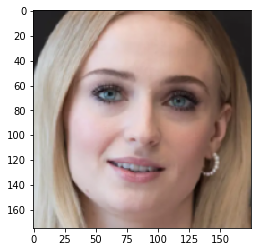

guess: Emma Watson    expected: sophie_turner.png


In [ ]:
newpath="/content/drive/MyDrive/CV_Project/test_images"

for i in imgs:
  exp=i
  i=os.path.join(newpath, i)
  img = tf.keras.preprocessing.image.load_img(i, target_size=(175, 175))
  img = tf.keras.preprocessing.image.img_to_array(img) / 255.
  plt.imshow(img)
  ind = np.argmax(model.predict(img[tf.newaxis, ...]))
  plt.show()
  print("guess:", classes_[ind][5:], "  ", "expected:", exp)
  